<a href="https://colab.research.google.com/github/bashakamal/bashakamal/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c spaceship-titanic


100% 299k/299k [00:00<00:00, 881kB/s]
100% 299k/299k [00:00<00:00, 880kB/s]


In [5]:
!kaggle competitions download -c titanic -p /content/datasets/


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 3.10MB/s]


In [6]:
import os
print(os.getcwd())


/content


In [7]:
!unzip /content/spaceship-titanic.zip


Archive:  /content/spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
# Loading the data
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")


In [9]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [11]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

we will take a look on categorical and numerical columns.

In [12]:
# Get categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns

# Get numerical columns
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

Numerical Columns:
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [13]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,8693,8693,0001_01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,8492,3,Earth,4602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CryoSleep,8476,2,False,5439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabin,8494,6560,G/734/S,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,8511,3,TRAPPIST-1e,5915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8514.0,NaN,NaN,NaN,28.82793,14.489021,0.0,19.0,27.0,38.0,79.0
VIP,8490,2,False,8291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoomService,8512.0,NaN,NaN,NaN,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,NaN,NaN,NaN,458.077203,1611.48924,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,NaN,NaN,NaN,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0


In [14]:
train.shape

(8693, 14)

We will check on Missing Percentage

In [15]:
missing_percentages = (train.isnull().sum() / len(test)) * 100

# Creating a bar plot
fig = go.Figure(data=go.Bar(x=missing_percentages.index, y=missing_percentages.values))
fig.update_layout(title='Missing Value Percentages', xaxis_title='Columns', yaxis_title='Percentage')
fig.show()


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


we will work on Categorical Columns:
Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')   for Univariate analysis .


Univariate analysis is an essential step in understanding individual variables in our dataset.

*HOME* PLANET ANALYSIS

In [17]:
train['HomePlanet'].isnull().sum()

201

In [18]:
# Calculate the mode of the 'HomePlanet' column
mode_value = train['HomePlanet'].mode()[0]

# Fill missing values with the mode
train['HomePlanet'].fillna(mode_value, inplace=True)

In [19]:
train['HomePlanet'].isnull().sum()

0

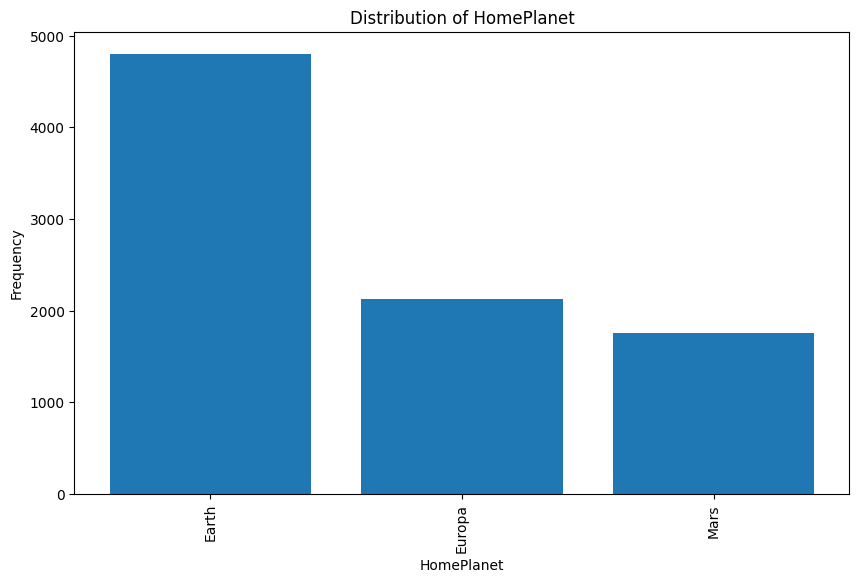

Frequency count of each HomePlanet category:
Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Percentage of each HomePlanet category:
Earth     55.251352
Europa    24.513977
Mars      20.234672
Name: HomePlanet, dtype: float64


In [20]:
# Calculate the frequency count of each category
category_counts = train['HomePlanet'].value_counts()

# Calculate the percentage of each category
category_percentages = train['HomePlanet'].value_counts(normalize=True) * 100

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('HomePlanet')
plt.ylabel('Frequency')
plt.title('Distribution of HomePlanet')
plt.xticks(rotation=90)
plt.show()

# Display the frequency count and percentage of each category
print("Frequency count of each HomePlanet category:")
print(category_counts)
print("\nPercentage of each HomePlanet category:")
print(category_percentages)

<Figure size 1000x600 with 0 Axes>

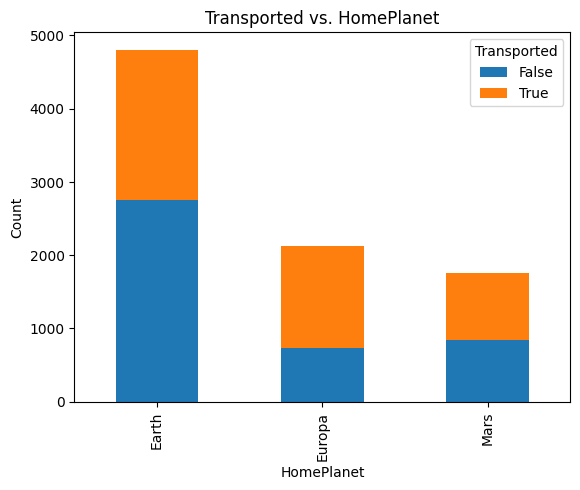

Cross-tabulation of HomePlanet and Transported:
Transported  False  True 
HomePlanet               
Earth         2749   2054
Europa         727   1404
Mars           839    920


In [21]:
# cross-tabulation of 'HomePlanet' and 'Transported'
cross_tab = pd.crosstab(train['HomePlanet'], train['Transported'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Transported vs. HomePlanet')
plt.xticks(rotation=90)
plt.legend(title='Transported', loc='upper right')
plt.show()

print("Cross-tabulation of HomePlanet and Transported:")
print(cross_tab)

In [22]:
# Create a contingency table of 'HomePlanet' and 'Transported'
contingency_table = pd.crosstab(train['HomePlanet'], train['Transported'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square test statistics:", chi2)
print("P-value:", p_value)

Chi-square test statistics: 318.93444995471856
P-value: 5.549631517016864e-70


CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.


In [23]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [24]:
train['CryoSleep'].isnull().sum()

217

In [25]:
# Calculate the mode of the 'HomePlanet' column
mode_value = train['CryoSleep'].mode()[0]

# Fill missing values with the mode
train['CryoSleep'].fillna(mode_value, inplace=True)

In [26]:
train['CryoSleep'].isnull().sum()

0

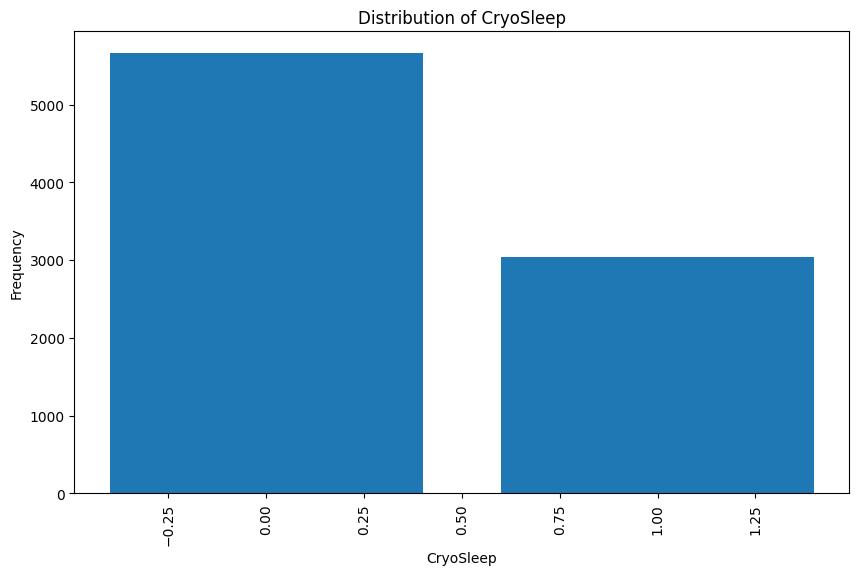

Frequency count of each CryoSleep category:
False    5656
True     3037
Name: CryoSleep, dtype: int64

Percentage of each CryoSleep category:
False    65.063844
True     34.936156
Name: CryoSleep, dtype: float64


In [27]:
# Calculate the frequency count of each category
category_counts = train['CryoSleep'].value_counts()

# Calculate the percentage of each category
category_percentages = train['CryoSleep'].value_counts(normalize=True) * 100

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('CryoSleep')
plt.ylabel('Frequency')
plt.title('Distribution of CryoSleep')
plt.xticks(rotation=90)
plt.show()

# Display the frequency count and percentage of each category
print("Frequency count of each CryoSleep category:")
print(category_counts)
print("\nPercentage of each CryoSleep category:")
print(category_percentages)


In [28]:
cryosleep=train['CryoSleep'].value_counts()
fig = go.Figure(data=go.Bar(x=cryosleep.index, y=cryosleep.values))
fig.update_layout(title='cryosleep', xaxis_title='cryosleep state', yaxis_title='Counts')
fig.show()


<Figure size 1000x600 with 0 Axes>

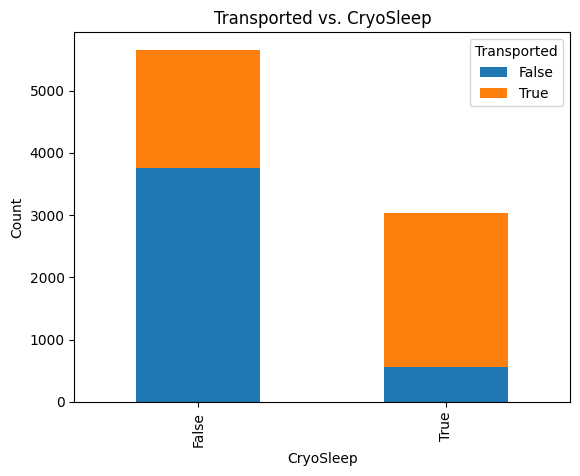

Cross-tabulation of CryoSleep and Transported:
Transported  False  True 
CryoSleep                
False         3761   1895
True           554   2483


In [29]:
# Create a cross-tabulation of 'CryoSleep' and 'Transported'
cross_tab = pd.crosstab(train['CryoSleep'], train['Transported'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Transported vs. CryoSleep')
plt.xticks(rotation=90)
plt.legend(title='Transported', loc='upper right')
plt.show()

# Alternatively, you can print the cross-tabulation table
print("Cross-tabulation of CryoSleep and Transported:")
print(cross_tab)

In [30]:
# Create a contingency table of 'CryoSleep' and 'Transported'
contingency_table = pd.crosstab(train['CryoSleep'], train['Transported'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square test statistics:", chi2)
print("P-value:", p_value)

Chi-square test statistics: 1838.5677340571679
P-value: 0.0


Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [31]:
train['Cabin'].isnull().sum()

199

In [32]:
# Calculate the mode of the 'HomePlanet' column
mode_value = train['Cabin'].mode()[0]

# Fill missing values with the mode
train['Cabin'].fillna(mode_value, inplace=True)

In [33]:
train['Cabin'].isnull().sum()

0

In [34]:
train['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [35]:
# Split the 'Cabin' column into three separate columns
train[['cabin_Deck', 'cabin_Number', 'cabin_Side']] = train['Cabin'].str.split('/', expand=True)

# Drop the original 'Cabin' column
train.drop('Cabin', axis=1, inplace=True)

In [36]:
train['cabin_Deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [37]:
train['cabin_Number'].unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [38]:
train['cabin_Side'].unique()

array(['P', 'S'], dtype=object)

I have decided to drop cabin number as it contain serial numbers , it wont help us in prediction part

In [39]:
train.drop('cabin_Number',axis=1,inplace=True)

In [40]:
train['cabin_Side'].isnull().sum()

0

In [41]:
cabin_side_counts = train['cabin_Side'].value_counts()
print(cabin_side_counts)

S    4487
P    4206
Name: cabin_Side, dtype: int64


In [42]:
cabin_side_counts = train['cabin_Side'].value_counts().reset_index()
fig = px.pie(cabin_side_counts, values='cabin_Side', names='index')
fig.show()

<Figure size 1000x600 with 0 Axes>

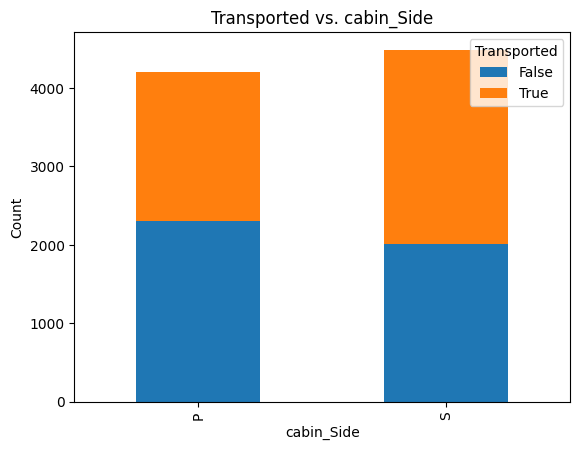

Cross-tabulation of cabin_Side and Transported:
Transported  False  True 
cabin_Side               
P             2308   1898
S             2007   2480


In [43]:
# Create a cross-tabulation of 'cabin_Side' and 'Transported'
cross_tab = pd.crosstab(train['cabin_Side'], train['Transported'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('cabin_Side')
plt.ylabel('Count')
plt.title('Transported vs. cabin_Side')
plt.xticks(rotation=90)
plt.legend(title='Transported', loc='upper right')
plt.show()

# Alternatively, you can print the cross-tabulation table
print("Cross-tabulation of cabin_Side and Transported:")
print(cross_tab)

In [44]:
# Create a contingency table of 'cabin_Side' and 'Transported'
contingency_table = pd.crosstab(train['cabin_Side'], train['Transported'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square test statistics:", chi2)
print("P-value:", p_value)

Chi-square test statistics: 88.9710828350531
P-value: 4.0062612965840844e-21


In [45]:
cabin_Deck_counts = train['cabin_Deck'].value_counts()
print(cabin_Deck_counts)

F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: cabin_Deck, dtype: int64


In [46]:
cabin_Deck_counts = train['cabin_Deck'].value_counts().reset_index()
fig = px.pie(cabin_Deck_counts, values='cabin_Deck', names='index')
fig.show()

<Figure size 1000x600 with 0 Axes>

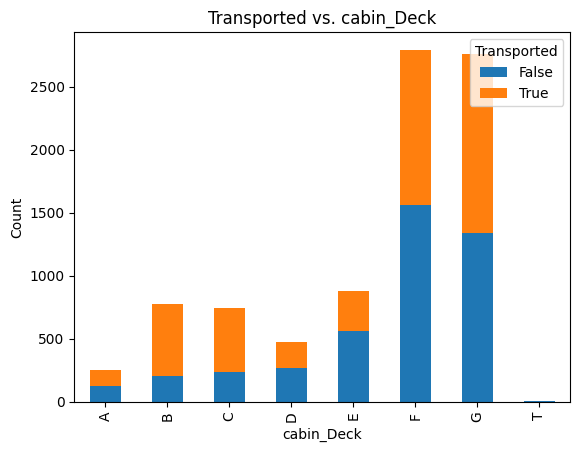

Cross-tabulation of cabin_Deck and Transported:
Transported  False  True 
cabin_Deck               
A              129    127
B              207    572
C              239    508
D              271    207
E              563    313
F             1565   1229
G             1337   1421
T                4      1


In [47]:
# Create a cross-tabulation of 'cabin_Deck' and 'Transported'
cross_tab = pd.crosstab(train['cabin_Deck'], train['Transported'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('cabin_Deck')
plt.ylabel('Count')
plt.title('Transported vs. cabin_Deck')
plt.xticks(rotation=90)
plt.legend(title='Transported', loc='upper right')
plt.show()

# Alternatively, you can print the cross-tabulation table
print("Cross-tabulation of cabin_Deck and Transported:")
print(cross_tab)

In [48]:
# Create a contingency table of 'cabin_Deck' and 'Transported'
contingency_table = pd.crosstab(train['cabin_Deck'], train['Transported'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square test statistics:", chi2)
print("P-value:", p_value)

Chi-square test statistics: 392.1500257871742
P-value: 1.1500787077265802e-80


Destination - The planet the passenger will be debarking to.italicized text

In [49]:
train['Destination'].isnull().sum()

182

In [50]:
# Calculate the mode of the 'Destination' column
mode_value = train['Destination'].mode()[0]

# Fill missing values with the mode
train['Destination'].fillna(mode_value, inplace=True)

In [51]:
train['Destination'].isnull().sum()

0

In [52]:
train['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<Figure size 1000x600 with 0 Axes>

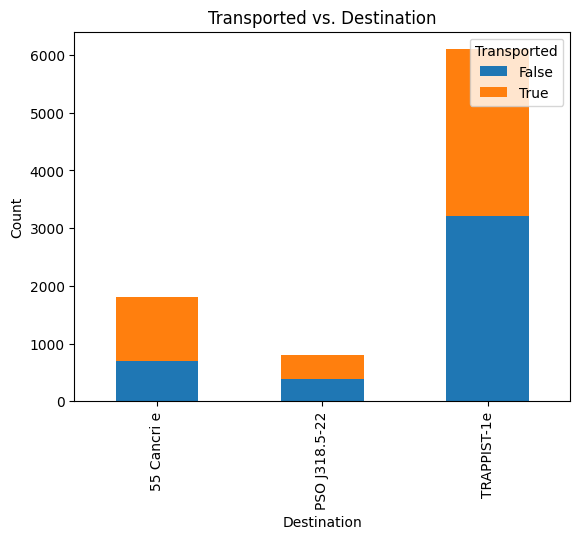

Cross-tabulation of Destination and Transported:
Transported    False  True 
Destination                
55 Cancri e      702   1098
PSO J318.5-22    395    401
TRAPPIST-1e     3218   2879


In [53]:
# Create a cross-tabulation of 'Destination' and 'Transported'
cross_tab = pd.crosstab(train['Destination'], train['Transported'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Transported vs. Destination')
plt.xticks(rotation=90)
plt.legend(title='Transported', loc='upper right')
plt.show()

# Alternatively, you can print the cross-tabulation table
print("Cross-tabulation of Destination and Transported:")
print(cross_tab)

In [54]:
# Create a contingency table of 'Destination' and 'Transported'
contingency_table = pd.crosstab(train['Destination'], train['Transported'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square test statistics:", chi2)
print("P-value:", p_value)

Chi-square test statistics: 105.56297434781096
P-value: 1.1947894351445014e-23


In [55]:
Destination_counts = train['Destination'].value_counts().reset_index()
fig = px.pie(Destination_counts, values='Destination', names='index')
fig.show()

In [56]:
train.drop('Name',axis=1,inplace=True)

Age - The age of the passenger.

In [57]:
train['Age'].isnull().sum()

179

In [58]:
# Calculate the mode of the 'Age' column
mode_value = train['Age'].mode()[0]

# Fill missing values with the mode
train['Age'].fillna(mode_value, inplace=True)

In [59]:
train['Age'].isnull().sum()

0

In [60]:
top_5_ages=train['Age'].value_counts().head(5)
top_5_ages

24.0    503
18.0    320
21.0    311
19.0    293
23.0    292
Name: Age, dtype: int64

In [61]:

age_stats = train['Age'].describe()
print(age_stats)

count    8693.000000
mean       28.728517
std        14.355438
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64


In [71]:
# Correlation Analysis
corr_coeff, p_value = pearsonr(train['Age'], train['Transported'])
print(f"Pearson Correlation Coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.07415286819919321
P-value: 4.444536765964964e-12


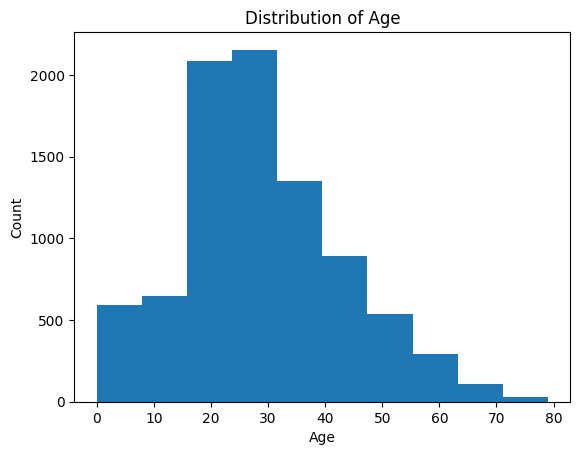

In [62]:
import matplotlib.pyplot as plt

plt.hist(train['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()


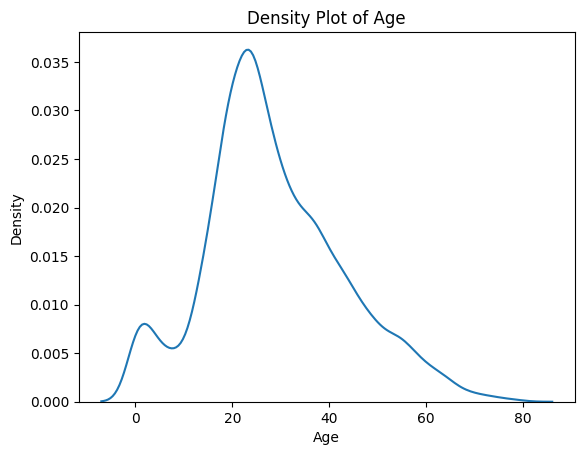

In [63]:
import seaborn as sns

sns.kdeplot(train['Age'])
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age')
plt.show()


In [64]:
# Create a contingency table of 'Age' and 'Transported'
contingency_table = pd.crosstab(train['Age'], train['Transported'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square test statistics:", chi2)
print("P-value:", p_value)

Chi-square test statistics: 256.74423590149223
P-value: 1.1614525165587873e-20


VIP - Whether the passenger has paid for special VIP service during the voyage.

In [65]:
train.drop('VIP',axis=1,inplace=True)

In [76]:
train.drop(['FoodCourt','ShoppingMall','Spa','VRDeck'],axis=1,inplace=True)

In [78]:
train.drop('PassengerId',axis=1,inplace=True)

In [80]:
train.drop('RoomService',axis=1,inplace=True)

In [81]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,Transported,cabin_Deck,cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,True,F,S


In [93]:
train.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
Transported    0
cabin_Deck     0
cabin_Side     0
dtype: int64

In [118]:
# Prepare the features and target
X = train[['Age', 'HomePlanet', 'CryoSleep', 'Destination', 'cabin_Deck', 'cabin_Side']]
train['Transported'] = train['Transported'].astype(int)
y = train['Transported']

In [189]:
X.shape

(8693, 6)

In [190]:
y.shape

(8693,)

In [98]:
# One-hot encode the categorical variables
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'cabin_Deck', 'cabin_Side']
X_train_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [111]:
X_train_encoded


,Age,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,cabin_Deck_B,cabin_Deck_C,cabin_Deck_D,cabin_Deck_E,cabin_Deck_F,cabin_Deck_G,cabin_Deck_T,cabin_Side_S
0,39.0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,24.0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,58.0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,33.0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,16.0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1,0,0,0,0,0,0,0,0,0,0,0,0
8689,18.0,0,0,1,1,0,0,0,0,0,0,1,0,1
8690,26.0,0,0,0,0,1,0,0,0,0,0,1,0,1
8691,32.0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [192]:
X_train_encoded.shape

(8693, 14)

In [124]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform the features
X_scaled = scaler.fit_transform(X_train_encoded)

array([[ 0.71555276,  1.754795  , -0.50366411, ..., -0.68168976,
        -0.02398972, -1.03286462],
       [-0.32940751, -0.56986714, -0.50366411, ..., -0.68168976,
        -0.02398972,  0.9681811 ],
       [ 2.03916911,  1.754795  , -0.50366411, ..., -0.68168976,
        -0.02398972,  0.9681811 ],
       ...,
       [-0.19007947, -0.56986714, -0.50366411, ...,  1.46694297,
        -0.02398972,  0.9681811 ],
       [ 0.22790464,  1.754795  , -0.50366411, ..., -0.68168976,
        -0.02398972,  0.9681811 ],
       [ 1.06387285,  1.754795  , -0.50366411, ..., -0.68168976,
        -0.02398972,  0.9681811 ]])

In [194]:
X_scaled.shape

(8693, 14)

In [226]:
test=pd.read_csv('/content/test.csv')

In [227]:
test.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [228]:
test.drop(['PassengerId','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP'],axis=1,inplace=True)

In [229]:
test.drop('Name',axis=1,inplace=True)

In [230]:
test.isnull().sum()

HomePlanet      87
CryoSleep       93
Cabin          100
Destination     92
Age             91
dtype: int64

In [231]:
# List of columns with missing values
columns_with_missing_values = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age']

# Fill missing values with the mode for each column
for column in columns_with_missing_values:
    mode_value = test[column].mode()[0]
    test[column].fillna(mode_value, inplace=True)

In [232]:
test.isnull().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
dtype: int64

In [233]:
# Split the 'Cabin' column into three separate columns
test[['cabin_Deck', 'cabin_Number', 'cabin_Side']] = test['Cabin'].str.split('/', expand=True)

# Drop the original 'Cabin' column
test.drop('Cabin', axis=1, inplace=True)

In [234]:
test.drop('cabin_Number',axis=1,inplace=True)

In [235]:
test

,HomePlanet,CryoSleep,Destination,Age,cabin_Deck,cabin_Side
0,Earth,True,TRAPPIST-1e,27.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,F,S
2,Europa,True,55 Cancri e,31.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,F,S
...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,G,S
4273,Earth,False,TRAPPIST-1e,42.0,G,P
4274,Mars,True,55 Cancri e,18.0,D,P
4275,Europa,False,TRAPPIST-1e,18.0,D,P


In [236]:
test_categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'cabin_Deck', 'cabin_Side']
X_test_encoded = pd.get_dummies(test, columns=test_categorical_cols, drop_first=True)

In [237]:
X_test_encoded.shape

(4277, 14)

In [151]:
X_test_encoded.columns

Index(['Age', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'cabin_Deck_B',
       'cabin_Deck_C', 'cabin_Deck_D', 'cabin_Deck_E', 'cabin_Deck_F',
       'cabin_Deck_G', 'cabin_Deck_T', 'cabin_Side_S'],
      dtype='object')

In [153]:
X_train_encoded.columns

Index(['Age', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'cabin_Deck_B',
       'cabin_Deck_C', 'cabin_Deck_D', 'cabin_Deck_E', 'cabin_Deck_F',
       'cabin_Deck_G', 'cabin_Deck_T', 'cabin_Side_S'],
      dtype='object')

In [238]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform the features
X_scaled_test = scaler.fit_transform(X_test_encoded)

In [239]:
X_scaled_test.shape

(4277, 14)

In [259]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [260]:

# Define the number of folds (k) for cross-validation
num_folds = 5

In [261]:
# Perform k-fold cross-validation for each model and get the cross-validation scores
cv_scores = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=num_folds, scoring='accuracy')
    cv_scores[model_name] = scores

In [262]:
# Print the cross-validation scores for each model and each fold
for model_name, scores in cv_scores.items():
    print(f"{model_name} - Cross-Validation Scores:", scores)

Logistic Regression - Cross-Validation Scores: [0.72225417 0.73433007 0.70960322 0.72209436 0.72497123]
Support Vector Machine - Cross-Validation Scores: [0.72627947 0.74755607 0.72857964 0.73532796 0.74223245]
Random Forest - Cross-Validation Scores: [0.68142611 0.68775158 0.68717654 0.70253165 0.70483314]
K-Nearest Neighbors - Cross-Validation Scores: [0.67567568 0.70442783 0.69580219 0.69102417 0.71518987]


In [263]:
# Calculate the average cross-validation score for each model
avg_cv_accuracy = {model_name: np.mean(scores) for model_name, scores in cv_scores.items()}

In [264]:
# Print the average cross-validation accuracy for each model
for model_name, avg_accuracy in avg_cv_accuracy.items():
    print(f"{model_name} - Average Cross-Validation Accuracy:", avg_accuracy)

Logistic Regression - Average Cross-Validation Accuracy: 0.7226506113390034
Support Vector Machine - Average Cross-Validation Accuracy: 0.7359951190815721
Random Forest - Average Cross-Validation Accuracy: 0.6927438027357231
K-Nearest Neighbors - Average Cross-Validation Accuracy: 0.6964239464104802


In [266]:
# Find the index of the best model (model with highest cross-validation score)
best_model_index = np.argmax(list(avg_cv_accuracy.values()))

In [267]:

# Get the best model
best_model_name = list(avg_cv_accuracy.keys())[best_model_index]
best_model = models[best_model_name]

In [268]:
# Train the best model on the entire training dataset
best_model.fit(X_scaled, y)

SVC()

In [269]:

# Make predictions on the test dataset using the best model
test_predictions = best_model.predict(X_scaled_test)

In [244]:
best_model

SVC(random_state=42)

In [245]:
cv_scores

[0.7228806947632694, 0.693663342357121, 0.6934335236247436, 0.7359951190815721]

In [270]:
test=pd.read_csv("/content/test.csv")

In [271]:
test['Transported'] = test_predictions.astype("bool")


In [272]:
submission_Data=pd.DataFrame(test[['PassengerId','Transported']])

In [275]:
submission_Data.to_csv("submission.csv",index=False)

In [274]:
submission_Data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
